# SzCzGiE-labs

### Part I

In [93]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from math import log10, log2, log
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [94]:
# loading data from csv
data = pd.read_csv('IBM.csv', parse_dates=['Date'])
N = len(data.index)
close = pd.Series(data['Close'], name='RawPrice')
dates = pd.Series(data['Date'], name='Date')

In [95]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500


In [96]:
# separation of close price data
close = pd.DataFrame({'Date':data['Date'], 'RawPrice':data['Close']})
close.set_index('Date')
pass

<AxesSubplot:title={'center':'ClosePrice'}, xlabel='Date'>

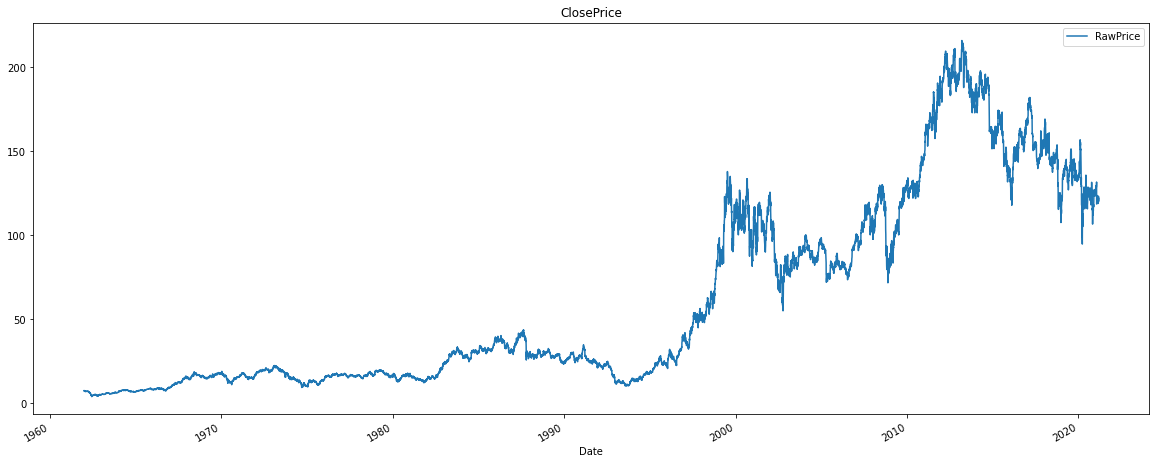

In [97]:
close.plot(figsize=(20,8), x='Date', y='RawPrice', title='ClosePrice')

<AxesSubplot:title={'center':'log(ClosePrice)'}, xlabel='Date'>

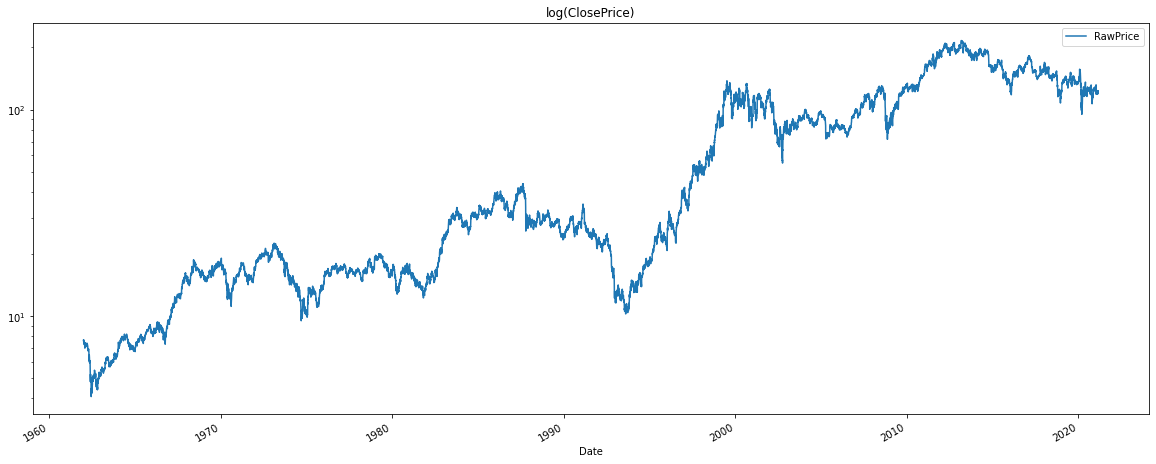

In [98]:
close.plot(figsize=(20,8), x='Date', y='RawPrice', logy=True, title='log(ClosePrice)')

In [99]:
# logarithmic rates of return for close prices
close['LogReturnRates'] = pd.Series(np.array([0.0] + [log(close['RawPrice'][i]/close['RawPrice'][i-1]) for i in range(1, len(close['RawPrice']))]))

<AxesSubplot:title={'center':'LogReturnRates'}, xlabel='Date'>

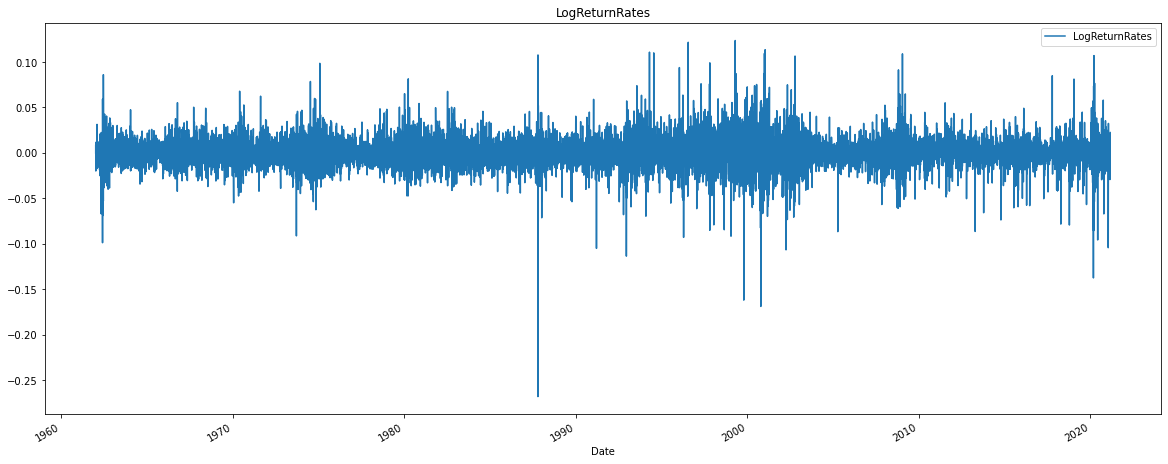

In [100]:
close.plot(figsize=(20,8), x='Date', y='LogReturnRates', title='LogReturnRates')

In [101]:
# standarized logarithimc rates of return for close prices (using z-score: std=1, mean=0)
close['StandarizedLogReturnRates']= (close['LogReturnRates'] - close['LogReturnRates'].mean()) / close['LogReturnRates'].std()
close.head()

,Date,RawPrice,LogReturnRates,StandarizedLogReturnRates
0,1962-01-02,7.626667,0.000000,-0.011651
1,1962-01-03,7.693333,0.008703,0.531862
2,1962-01-04,7.616667,-0.010015,-0.637102
3,1962-01-05,7.466667,-0.019890,-1.253790
4,1962-01-08,7.326667,-0.018928,-1.193704


<AxesSubplot:title={'center':'StandarizedLogReturnRates'}, xlabel='Date'>

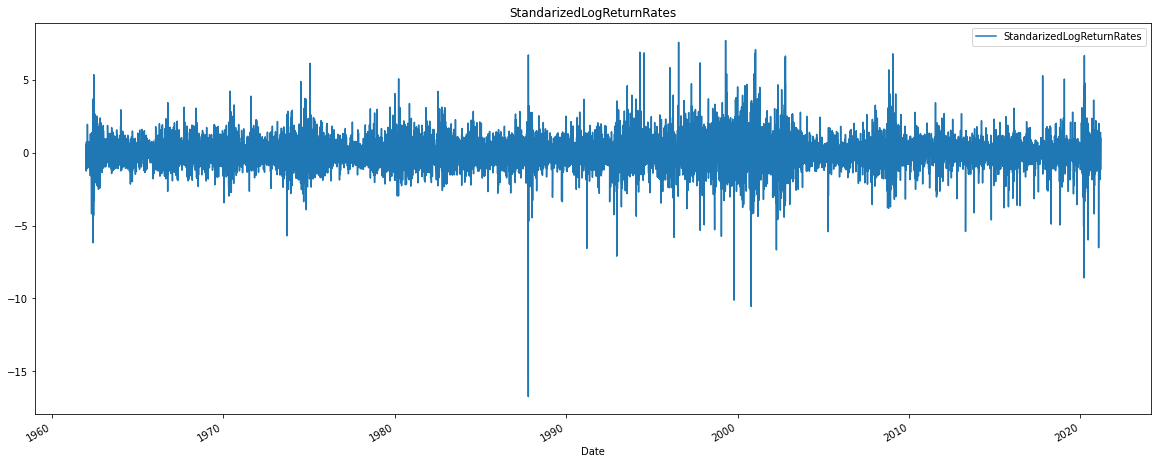

In [102]:
close.plot(figsize=(20,8), x='Date', y='StandarizedLogReturnRates', title='StandarizedLogReturnRates')

### Part II

In [104]:
# white noise
mean = 0
std = 1
N = len(data['Close'])
white_noise = pd.DataFrame(data=np.random.normal(mean, std, size=N), columns=['StandarizedWhiteNoise'], index=data['Date'])

<AxesSubplot:title={'center':'StandarizedWhiteNoise'}, xlabel='Date'>

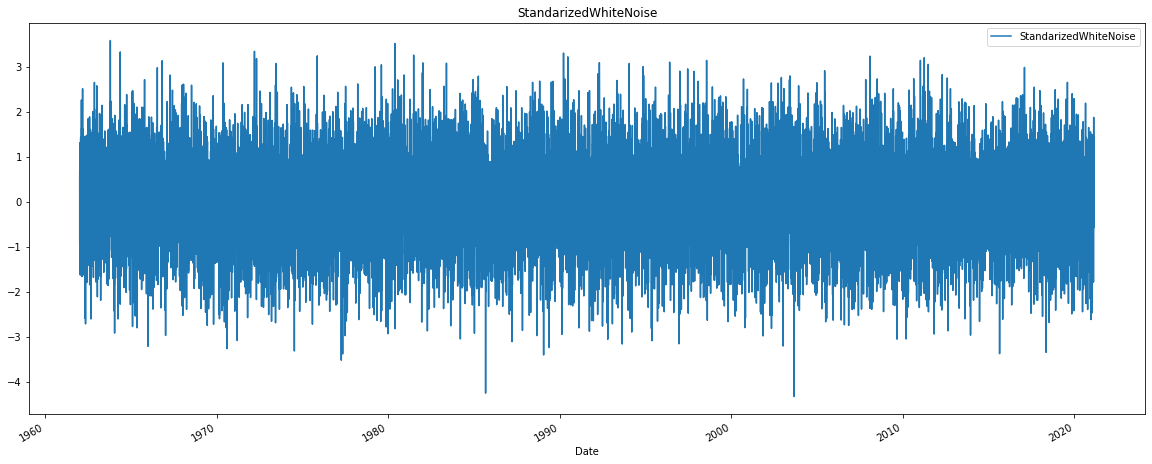

In [105]:
white_noise.plot(figsize=(20,8), y='StandarizedWhiteNoise', title='StandarizedWhiteNoise')

In [106]:
# white noise cumulative sume
white_noise['CumulativeSum'] = white_noise.cumsum()
white_noise.head()

,StandarizedWhiteNoise,CumulativeSum
Date,,
1962-01-02,0.668671,0.668671
1962-01-03,-0.934498,-0.265827
1962-01-04,0.273198,0.007371
1962-01-05,1.310334,1.317705
1962-01-08,-1.608842,-0.291137


<AxesSubplot:title={'center':'CumulativeSum(WhiteNoise) - Brownian motion'}, xlabel='Date'>

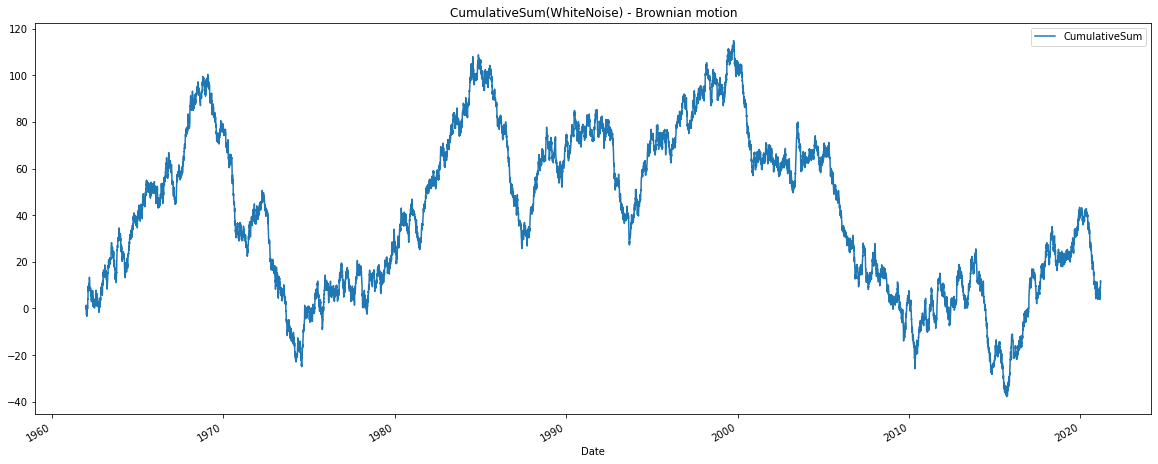

In [107]:
white_noise.plot(figsize=(20,8), y='CumulativeSum', title='CumulativeSum(WhiteNoise) - Brownian motion')

<AxesSubplot:title={'center':'Standarided LogReturnRatesOfClosePrice & StandarizedCumulativeSumOfWhiteNoise'}, xlabel='Date'>

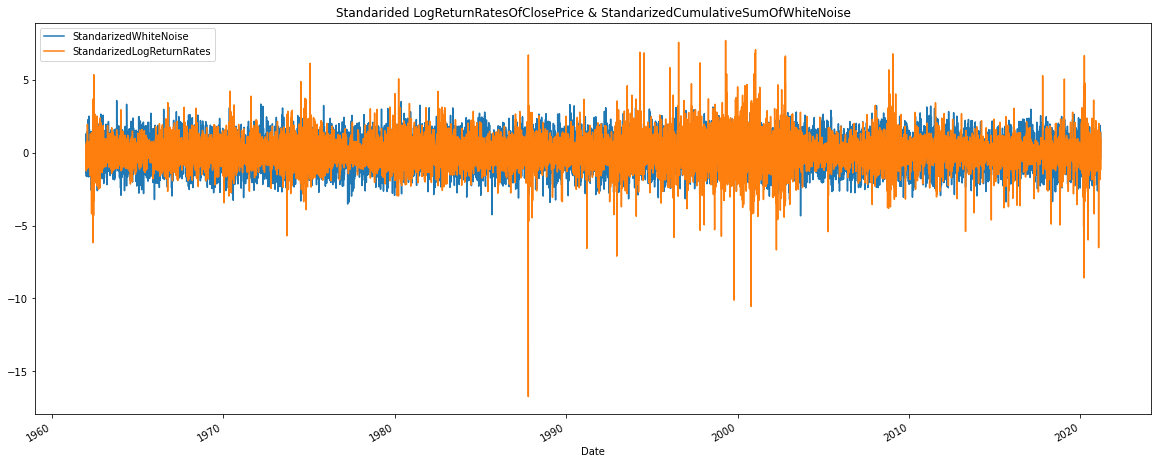

In [108]:
ax = white_noise.plot(y='StandarizedWhiteNoise')
close.plot(figsize=(20,8), x='Date', y='StandarizedLogReturnRates', ax=ax, title='Standarided LogReturnRatesOfClosePrice & StandarizedCumulativeSumOfWhiteNoise', legend=True)

### Part III

Histograms

array([[<AxesSubplot:title={'center':'StandarizedLogReturnRates'}>]],
      dtype=object)

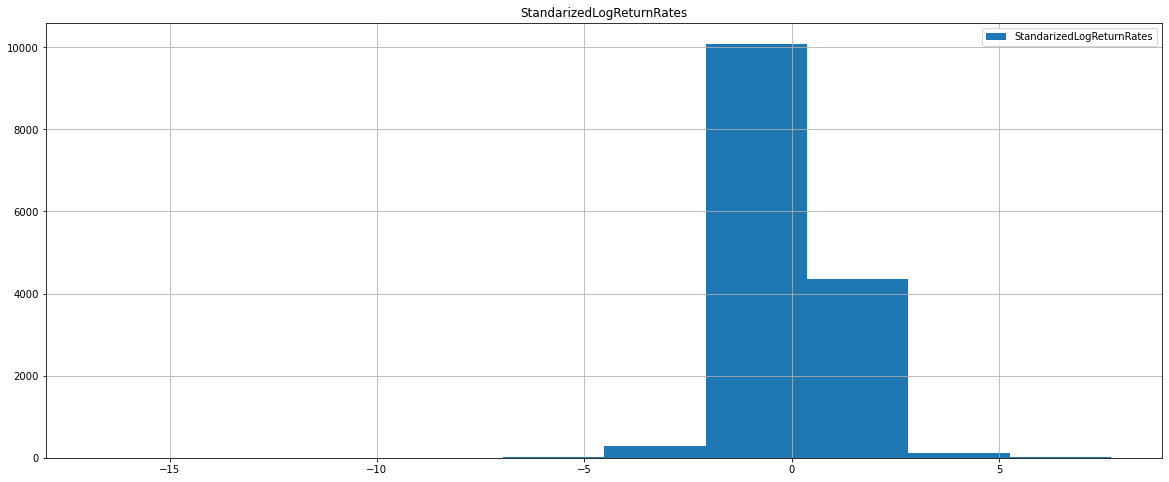

In [130]:
# standarized Log Return Rates of Close prices histogram
close.hist(figsize=(20,8), column=['StandarizedLogReturnRates'], legend=True)

array([[<AxesSubplot:title={'center':'StandarizedWhiteNoise'}>]],
      dtype=object)

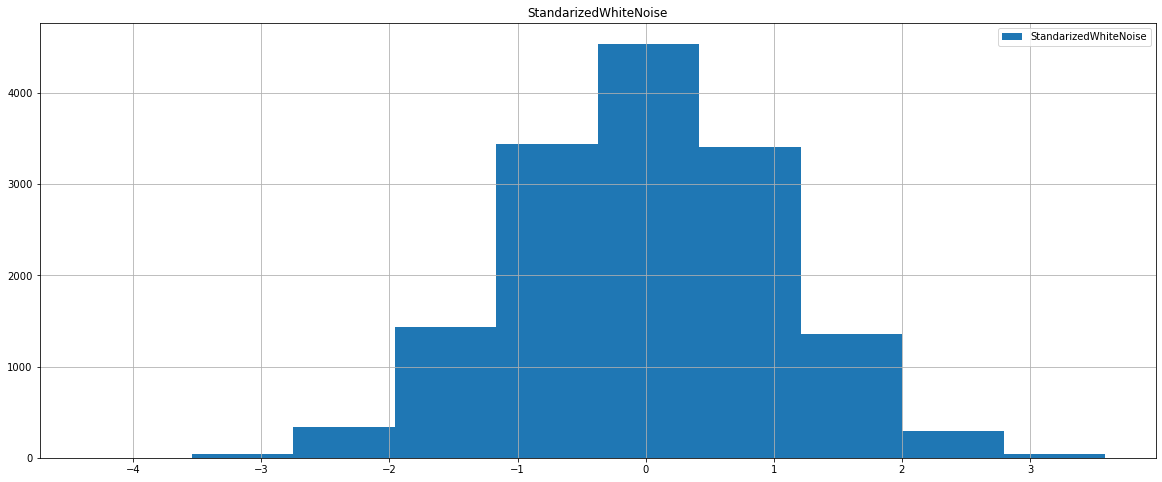

In [129]:
# standarized White noise histogram
white_noise.hist(figsize=(20,8), column=['StandarizedWhiteNoise'], legend=True)

array([[<AxesSubplot:title={'center':'CumulativeSum'}>]], dtype=object)

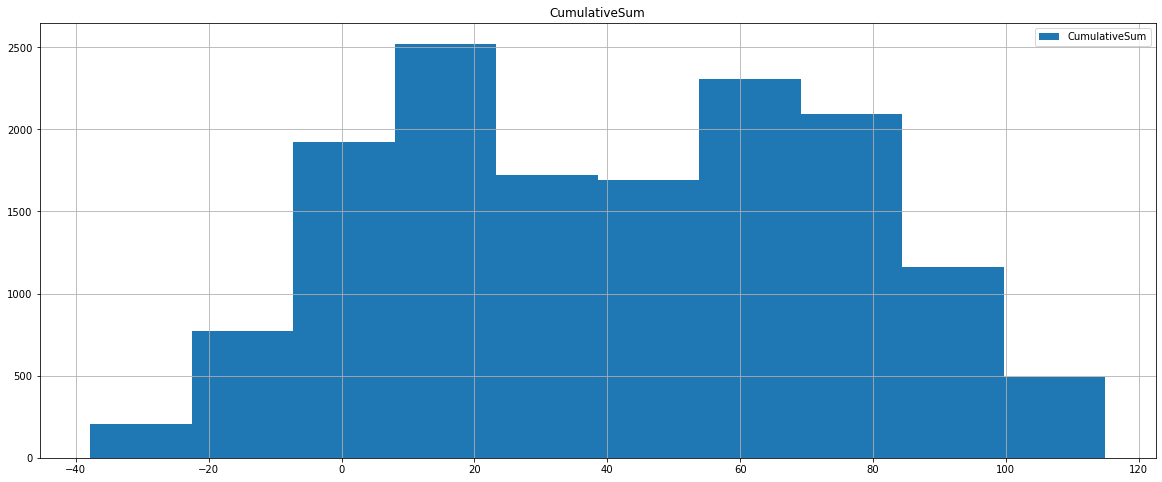

In [128]:
# standarized White noise CumulativeSum histogram
white_noise.hist(figsize=(20,8), column=['CumulativeSum'], legend=True)

array([[<AxesSubplot:title={'center':'StandarizedLogReturnRates'}>]],
      dtype=object)

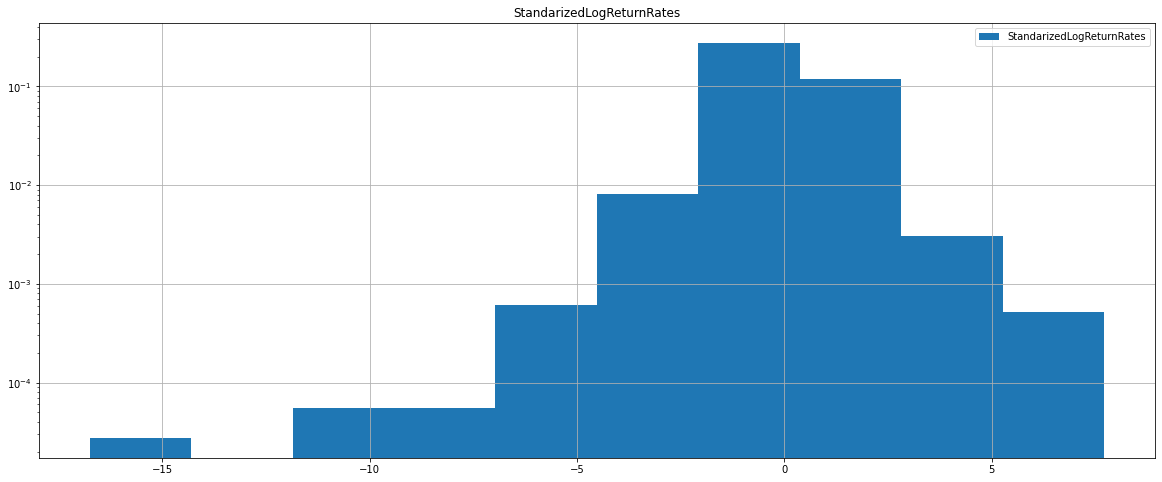

In [126]:
# Standarized Close LogReturnRates histogram as percentages (log scale)
close.hist(figsize=(20,8), column=['StandarizedLogReturnRates'], log=True, density=True, legend=True)

array([[<AxesSubplot:title={'center':'CumulativeSum'}>]], dtype=object)

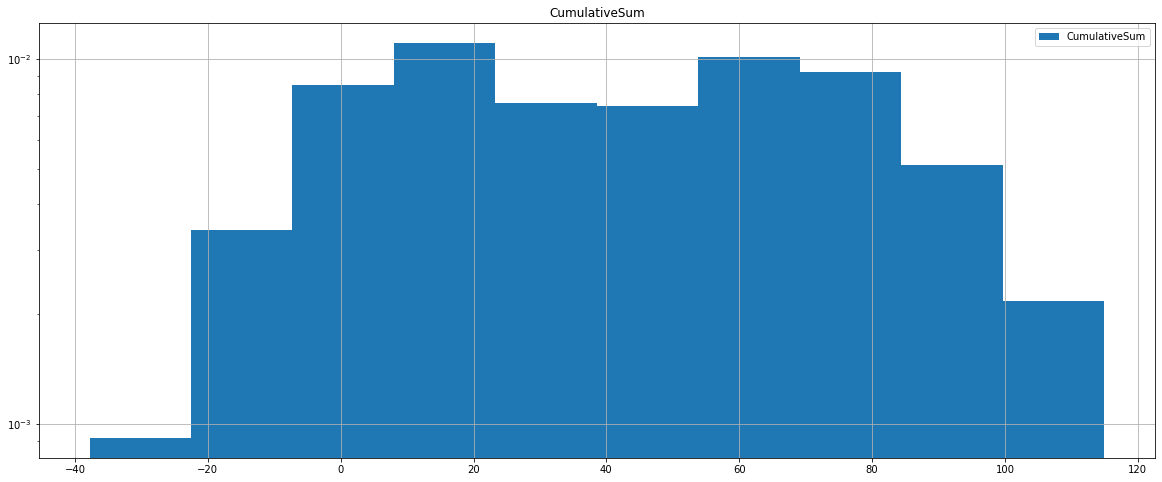

In [127]:
# Standarized White noise Cumulative Sums histogram as percentages (log scale)
white_noise.hist(figsize=(20,8), column=['CumulativeSum'], log=True, density=True, legend=True)

Distribution parameters

In [131]:
# close prices kurtosis
close.kurt(axis=0)

RawPrice                     -0.485366
LogReturnRates               12.239468
StandarizedLogReturnRates    12.239468
dtype: float64

In [132]:
# close prices skeweness
close.skew(axis=0)

RawPrice                     0.924353
LogReturnRates              -0.342694
StandarizedLogReturnRates   -0.342694
dtype: float64

In [133]:
# white noise kurtosis
white_noise.kurt(axis=0)

StandarizedWhiteNoise    0.011218
CumulativeSum           -1.015660
dtype: float64

In [134]:
# white noise skeweness
white_noise.skew(axis=0)

StandarizedWhiteNoise   -0.038980
CumulativeSum            0.003404
dtype: float64

Cumulative Distribution Function for both series (close data and white noises)

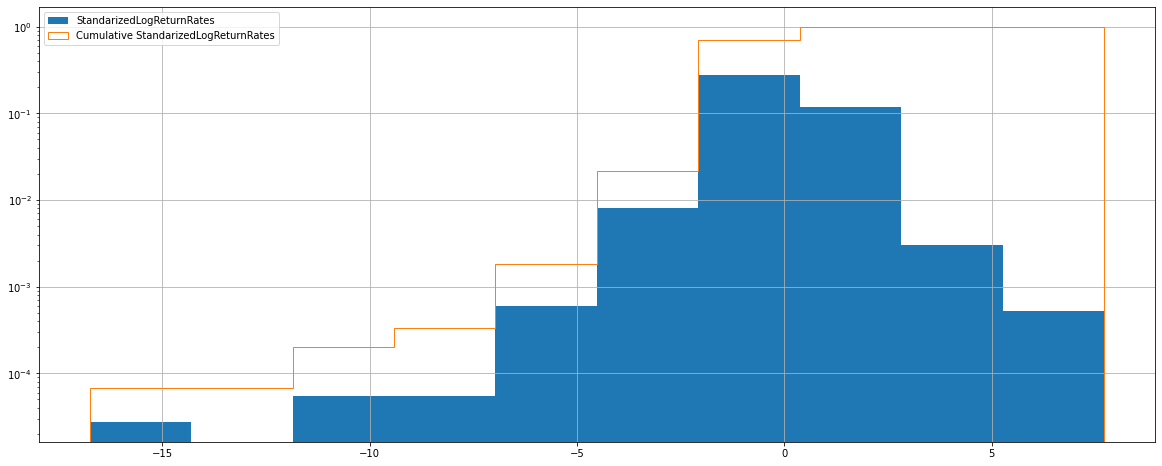

In [137]:
# Standarized Close LogReturnRates histograms as percentages (log scale)
plt.figure(figsize=(20,8))
plt.grid(True)
plt.hist(close['StandarizedLogReturnRates'], log=True, density=True, label="StandarizedLogReturnRates")
plt.hist(close['StandarizedLogReturnRates'], log=True, density=True, cumulative=1, histtype='step', label="Cumulative StandarizedLogReturnRates")
plt.legend(loc='upper left')

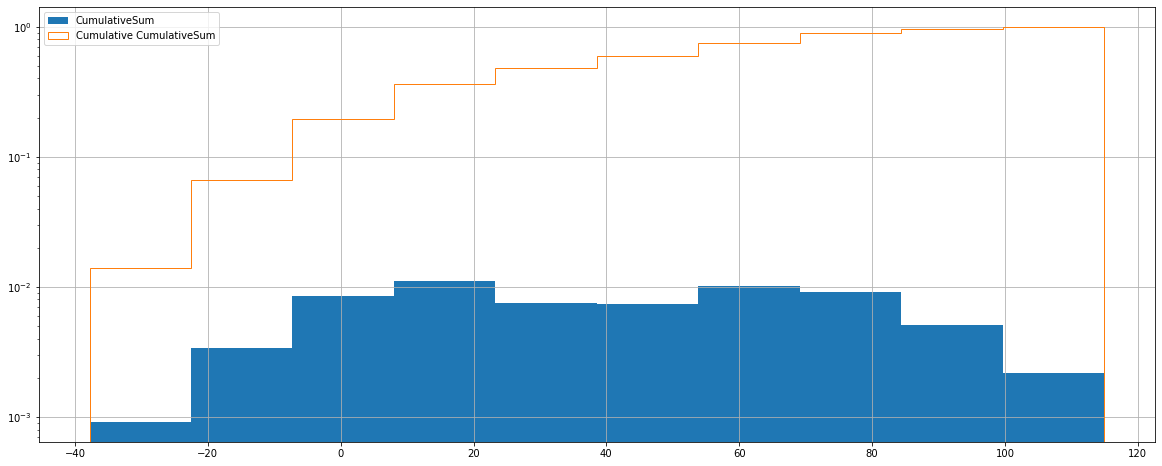

In [143]:
# Standarized CumulativeSume of White Noise histograms as percentages (log scale)
plt.figure(figsize=(20,8))
plt.grid(True)
plt.hist(white_noise['CumulativeSum'], log=True, density=True, label="CumulativeSum")
plt.hist(white_noise['CumulativeSum'], cumulative=1, histtype='step', log=True, density=True, label="Cumulative CumulativeSum")
plt.legend(loc='upper left')